# Wine Quality Prediction
#### Tridib Dalui

In [1]:
import numpy as np
import pandas as pd

C:\Users\tridi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df=pd.read_csv('winequality-red.csv')

### Data Preprocessing

In [3]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
119,7.0,0.690,0.08,1.8,0.097,22.0,89.0,0.99590,3.34,0.54,9.2,6
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4,5
1566,6.7,0.160,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,6
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4,5
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
527,7.0,0.380,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.4,6
1466,7.3,0.480,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0,7
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
270,7.9,0.545,0.06,4.0,0.087,27.0,61.0,0.99650,3.36,0.67,10.7,6
934,6.6,0.610,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,5


In [10]:
df.shape

(1599, 12)

In [4]:
# info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# how many outputs are there

df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
# checking for null values

df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no Null values 

In [8]:
#checking for duplicate values

df.duplicated().sum()

240

In [9]:
# Statistical description

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


There is outlier in fixed acidity lets remove that

In [11]:
# Removing Outliers

df=df[df['fixed acidity']<=13.0]

In [12]:
df.shape

(1579, 12)

### Data Visulaization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

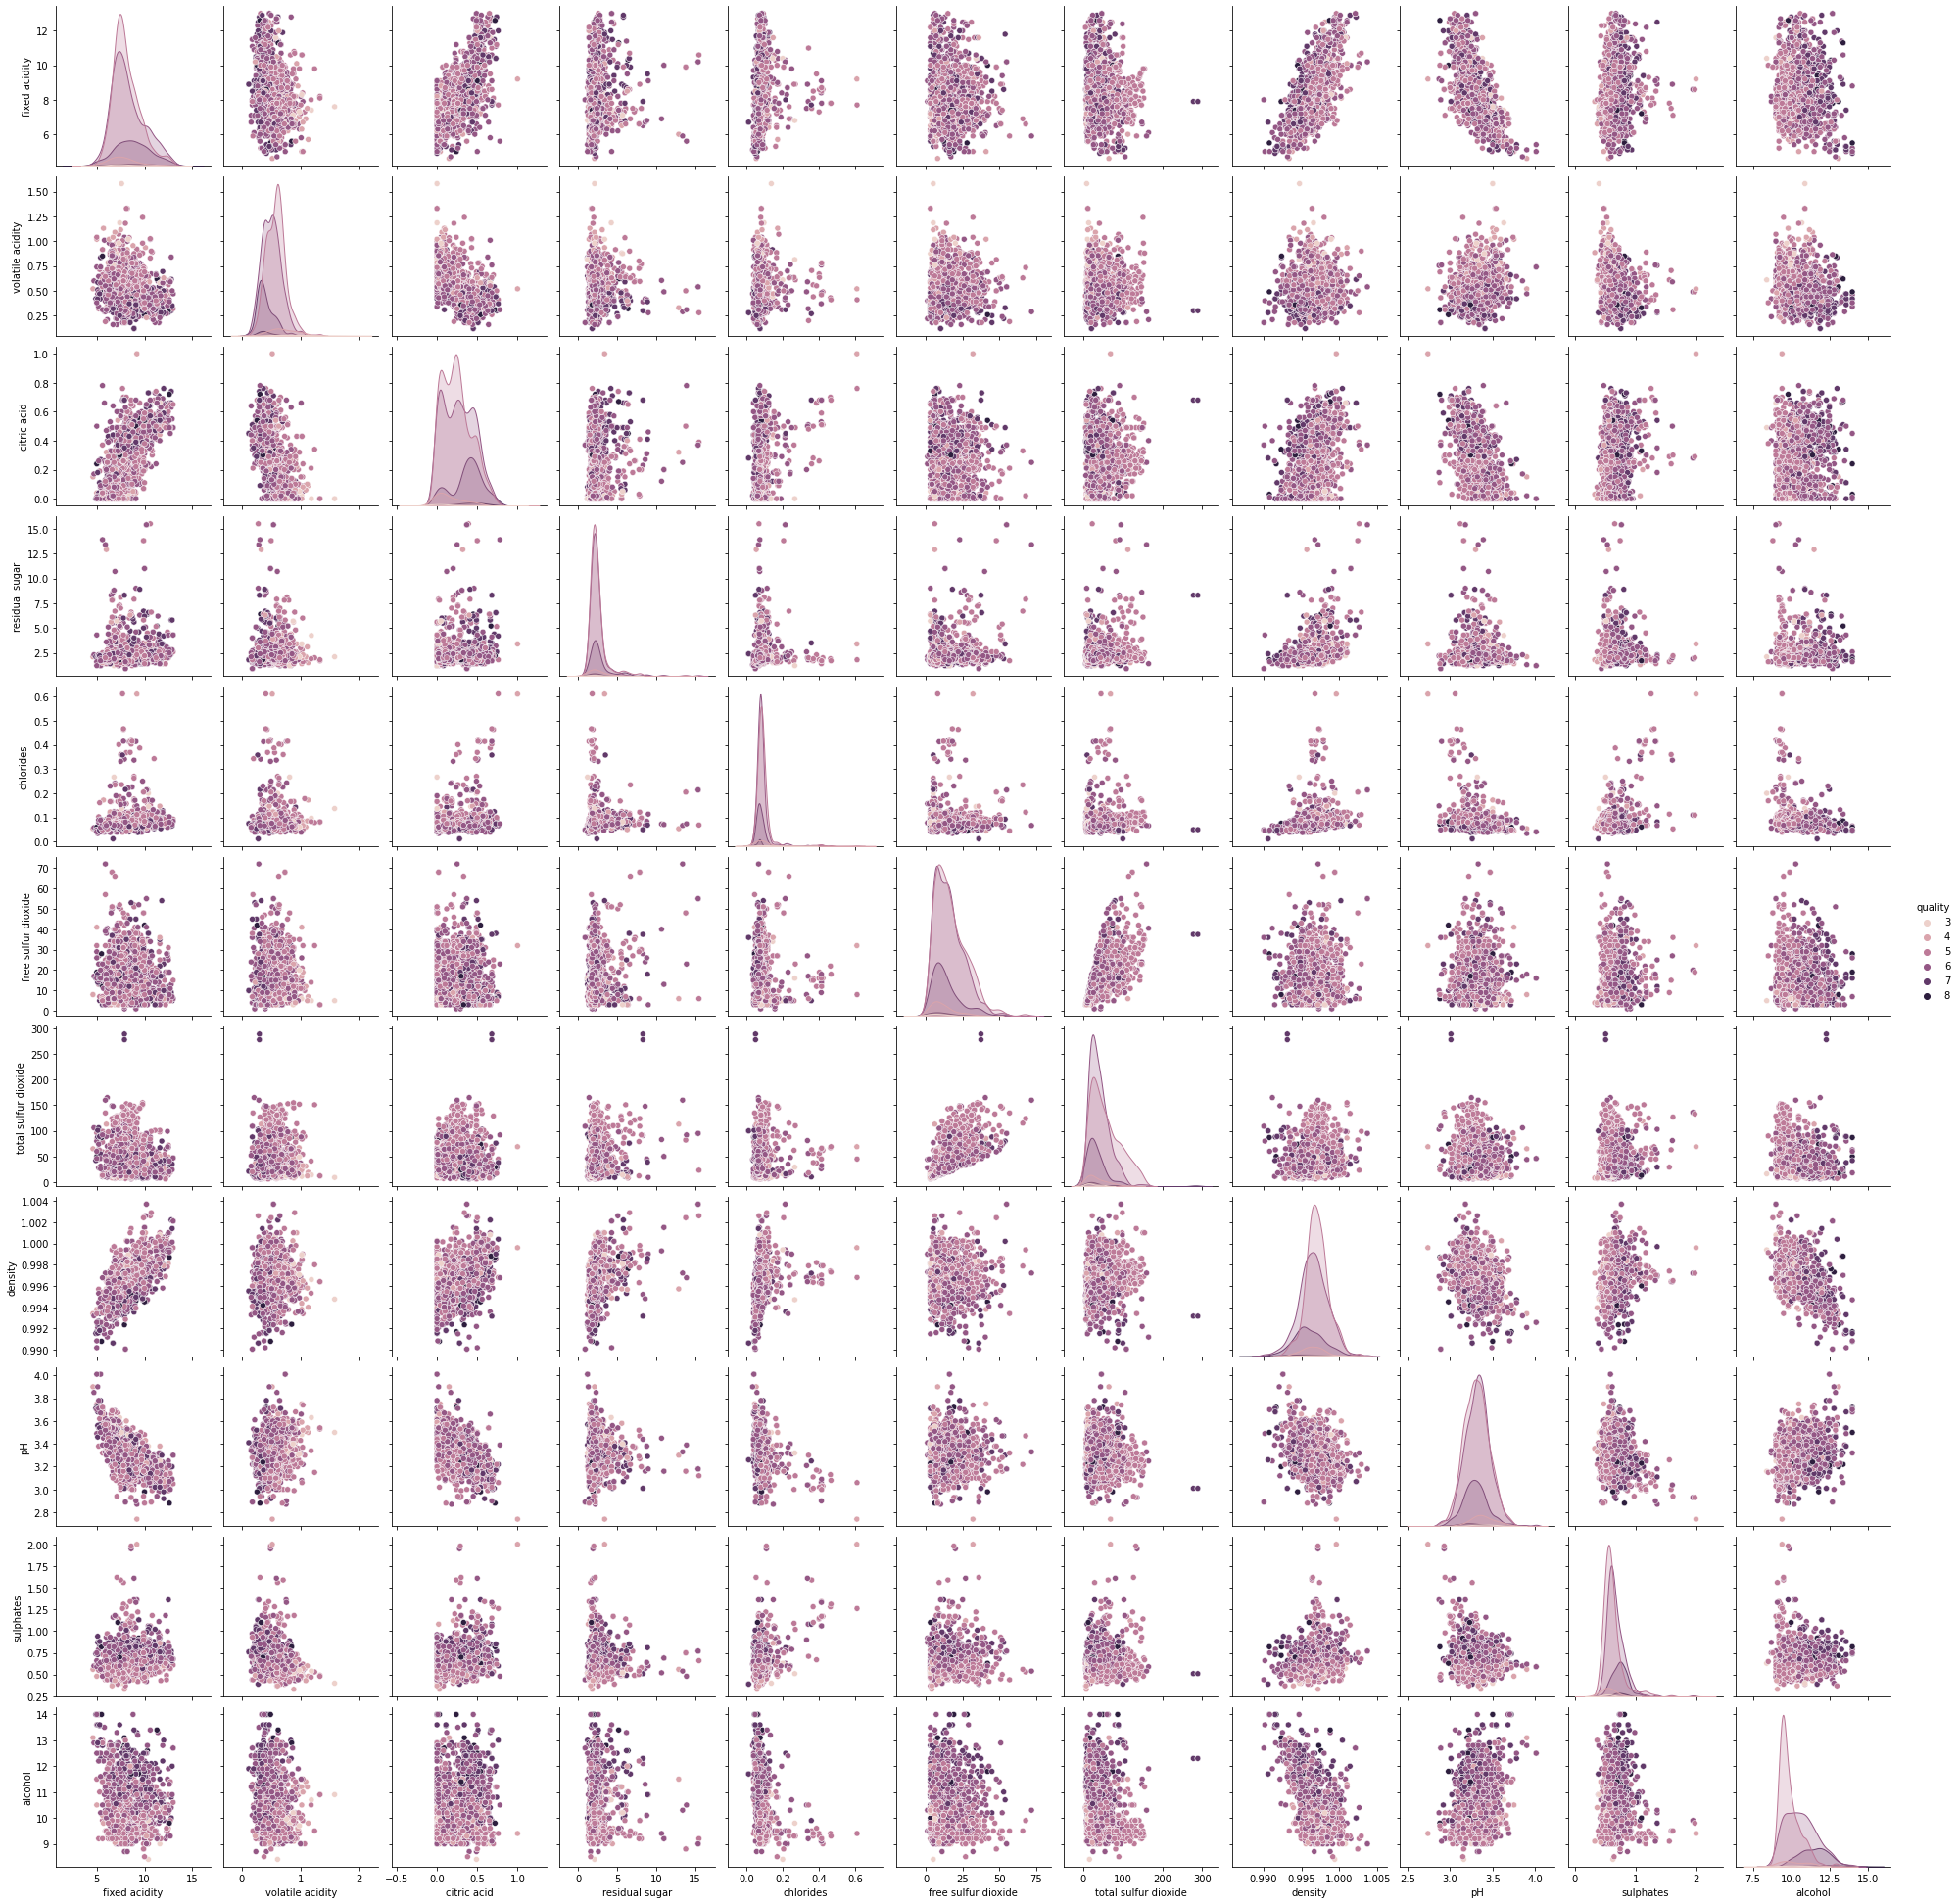

In [15]:
sns.pairplot(df,hue='quality')

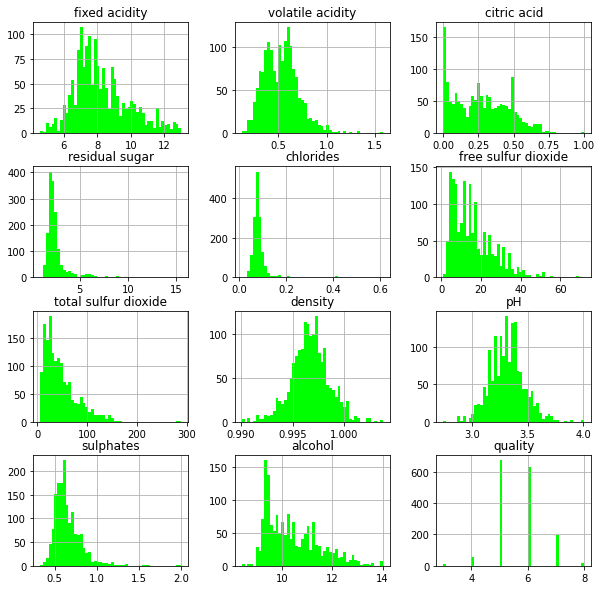

In [17]:
df.hist(figsize=(10,10),bins=50,color='lime')
plt.show()

<AxesSubplot: >

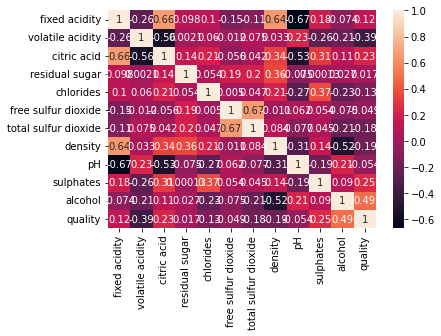

In [28]:
corr = df.corr()
sns.heatmap(corr,annot=True)

### Feature selection

In [25]:
#lets group our data by mean

df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.100000,0.577641,0.240223,2.511350,0.092731,17.019288,56.695846,0.997059,3.308175,0.620208,9.884421
6,8.271701,0.498927,0.268871,2.473529,0.084987,15.779014,40.966614,0.996556,3.321955,0.674293,10.641070
7,8.752308,0.405051,0.370615,2.720513,0.076446,14.082051,35.051282,0.996015,3.296051,0.740872,11.490855
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [29]:
# Create Classification version of target variable

df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

In [31]:
df['goodquality'].value_counts()

0    1366
1     213
Name: goodquality, dtype: int64

### Separating Input & Output data

In [32]:
x=df.drop(['quality','goodquality'], axis = 1) #input
y=df['goodquality']

In [36]:
x.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
475,9.6,0.680,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2
1330,7.4,0.600,0.26,2.1,0.083,17.0,91.0,0.99616,3.29,0.56,9.8
1072,7.2,0.350,0.26,1.8,0.083,33.0,75.0,0.99680,3.40,0.58,9.5
190,8.2,0.500,0.35,2.9,0.077,21.0,127.0,0.99760,3.23,0.62,9.4
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.99650,3.45,0.56,10.7


In [37]:
y.sample(5)

1209    1
481     1
1271    0
142     0
1165    0
Name: goodquality, dtype: int64

### Splitting Dataset

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

### Model Building

#### Let us consider 6 algorithms

1)Logistic Regression 2)KNN 3)SVC 4)Decision Tree 5)Naive Bayes 6)Random Forest

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
# 1) Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.869198312236287


In [41]:
# 2) K Nearest neighbors

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8628691983122363


In [42]:
# 3) Support Vector Classification

from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8586497890295358


In [43]:
# 4) Decison tree Classification

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8649789029535865


In [45]:
# 5) Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8523206751054853


In [46]:
# 6) Ranodm Forest Classification

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8966244725738397


#### So, Random Forest Classifier is Giving the Highest Accuracy

### Let's Test our model now 

In [67]:
pred=model.predict([[ '9.1','0.25','0.34','2.0','0.071','45.0','67.0','0.99769','3.44','0.86','10.2'  ]])

if(pred[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine') # Original Ans Good Quality 

Good Quality Wine


In [69]:
pred=model.predict([[ '5.2','0.32','0.25','1.8','0.103','13.0','50.0','0.9957','3.38','0.55','9.2'  ]])

if(pred[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine') # Original Ans Bad Quality

Bad Quality Wine


Now When Our Model is working good 

### Save The Model

In [70]:
import pickle

In [71]:
pickle.dump(model,open('wine_quality_checker.pkl','wb'))

# Thank You